# GKP-Based Quantum Error Correction in Photonic Systems
***Series:** GKP-QEC (S01)*


## Introduction

Xanadu’s quest to build logical qubits is well underway, and the separation between physical qubits and logical qubits is becoming increasingly clear.

In photonic quantum computing, the physical degrees of freedom are continuous. Light behaves like an analog system: it has position, momentum, phase, and amplitude. But most quantum algorithms are written in terms of discrete units of information — qubits that are either `|0\rangle` or `|1\rangle`.

The goal is simple: we want end users to work with clean, digital logical states without having to worry about the continuous behavior of light underneath. This logical description is what we refer to as a high-level abstraction.

Once this abstraction is in place, quantum software becomes much easier to reason about. Users can focus on algorithms and circuits, rather than on the position and momentum of optical modes.

But abstraction alone is not enough. As soon as we try to encode information into a quantum state, errors inevitably appear.

To make this concrete, imagine a very simple piece of classical information, say `x = 1`. We encode this into a quantum state, and suppose we intend it to represent `|1\rangle`. If, due to noise, the state allows us to misidentify it as something else, then we have a problem. That quantum information is no longer reliable.

This is why quantum error correction is essential. We need ways to detect errors and correct them before they destroy the logical information we care about.

Over the years, many quantum error correction codes have been developed, including repetition codes, Shor codes, Steane codes, surface codes, and bosonic codes. You may have encountered some of these already.

Xanadu’s focus is on bosonic quantum error correction, which is particularly well suited to photonic hardware. This family includes codes such as GKP, cat codes, binomial codes, and Fock-state encodings.

Among these, the Gottesman–Kitaev–Preskill (GKP) code plays a central role. GKP encoding stores logical qubits in grid-like structures in phase space, allowing small displacement errors, which are common in photonic systems — to be detected and corrected.

In this demo, we’ll take the perspective of a high-level user and follow a simple conceptual flow:
logical state → error syndrome → correction.

## Logical Qubit Model in PennyLane

Thinking about GKP error correction from a software point of view leads to a slightly surprising realization: most of the hardware-level detail is not required to build useful intuition. The continuous-variable machinery—grid states in phase space, syndrome extraction, displacement corrections, matters enormously for device design, but much less for understanding how error correction appears to a quantum program.

With that in mind, the discussion here deliberately strips things down.

At the logical level, a GKP-encoded photonic qubit can be treated as an effective two-level system described by a density matrix \rho, exactly as in standard qubit-based quantum computing. The effect of imperfect encoding and error correction is then captured by an effective logical noise channel acting on this state,

\rho \;\longrightarrow\; \mathcal{E}(\rho),

where \mathcal{E} is a completely positive, trace-preserving (CPTP) map representing residual logical errors after correction. This viewpoint is standard in architecture-level analyses of bosonic codes, including the original GKP proposal and later fault-tolerant extensions [1,2].

In practice, many different logical noise models are possible. PennyLane [5] provides a range of quantum channels for this purpose, including qml.PhaseDamping, qml.BitFlip, qml.PhaseFlip, qml.AmplitudeDamping, and qml.GeneralizedAmplitudeDamping. Each of these corresponds to a different way in which logical information can degrade once the system is viewed as an effective qubit.

In this demo, however, the focus is placed exclusively on the depolarizing channel, implemented in PennyLane as qml.DepolarizingChannel. At the mathematical level, the depolarizing channel acts as

\mathcal{E}_{\text{dep}}(\rho)
\;=\;
(1 - p)\,\rho
\;+\;
\frac{p}{3}
\left(
X \rho X
+
Y \rho Y
+
Z \rho Z
\right),

where p \in [0,1] is the effective logical noise strength and X, Y, Z are the Pauli operators. This channel can be interpreted as replacing the logical qubit with a maximally mixed state with probability p, while leaving it untouched with probability 1-p.

The appeal of this model is not physical realism, but clarity. In a real photonic system, residual logical noise after GKP correction arises from a combination of finite squeezing, photon loss, measurement imprecision, and imperfect decoding [1,4]. Modeling all of these effects explicitly would obscure the main point of this demo.

Instead, the depolarizing channel provides a clean, hardware-agnostic way to represent the net outcome of imperfect GKP error correction: a single parameter p that quantifies how much logical noise remains once the physical correction procedures have done their work. By varying this parameter, it becomes possible to study how error correction manifests itself at the software level, as changes in logical coherence, without ever simulating the underlying continuous-variable physics.

This abstraction is exactly what allows photonic GKP qubits to integrate naturally into high-level quantum programming frameworks like PennyLane, alongside qubits realized in very different physical platforms.

## Requirements

This demo uses PennyLane to illustrate logical noise and error correction at the software level.

If PennyLane is not already installed, it can be installed with:

```bash
pip install pennylane
```

## Case 1: Logical coherence under effective noise
> *Thinking question: “What does logical noise do if we don’t correct it well enough?”*

Before thinking about error correction, it’s useful to understand how logical information degrades in the presence of noise.

From a software perspective, one of the simplest indicators of whether a logical qubit is behaving well is its coherence. For a qubit prepared in a superposition state, coherence determines how reliably quantum information can be processed and interfered.

In this example, we prepare a logical qubit in a superposition using a Hadamard gate and then apply an effective logical noise channel. We monitor the expectation value `⟨X⟩`, which serves as a proxy for logical coherence. As the strength of the effective noise increases, we expect this coherence to decrease.

The goal here is not to model the physical noise acting on a photonic system, but to observe how residual imperfections, after encoding and (imperfect) error correction, appear at the logical level seen by quantum software. In the code below; we use PennyLane for this GKP-demo analysis.

Logical GKP qubit circuit (effective model):
0: ──H──DepolarizingChannel(0.10)─┤  <X>

Logical coherence vs effective noise:
  p = 0.00  →  ⟨X⟩ = 1.000
  p = 0.01  →  ⟨X⟩ = 0.980
  p = 0.03  →  ⟨X⟩ = 0.960
  p = 0.04  →  ⟨X⟩ = 0.940
  p = 0.06  →  ⟨X⟩ = 0.920
  p = 0.07  →  ⟨X⟩ = 0.900
  p = 0.09  →  ⟨X⟩ = 0.880
  p = 0.10  →  ⟨X⟩ = 0.860
  p = 0.12  →  ⟨X⟩ = 0.840
  p = 0.14  →  ⟨X⟩ = 0.820
  p = 0.15  →  ⟨X⟩ = 0.800
  p = 0.16  →  ⟨X⟩ = 0.780
  p = 0.18  →  ⟨X⟩ = 0.760
  p = 0.20  →  ⟨X⟩ = 0.740
  p = 0.21  →  ⟨X⟩ = 0.720
  p = 0.22  →  ⟨X⟩ = 0.700
  p = 0.24  →  ⟨X⟩ = 0.680
  p = 0.26  →  ⟨X⟩ = 0.660
  p = 0.27  →  ⟨X⟩ = 0.640
  p = 0.28  →  ⟨X⟩ = 0.620
  p = 0.30  →  ⟨X⟩ = 0.600


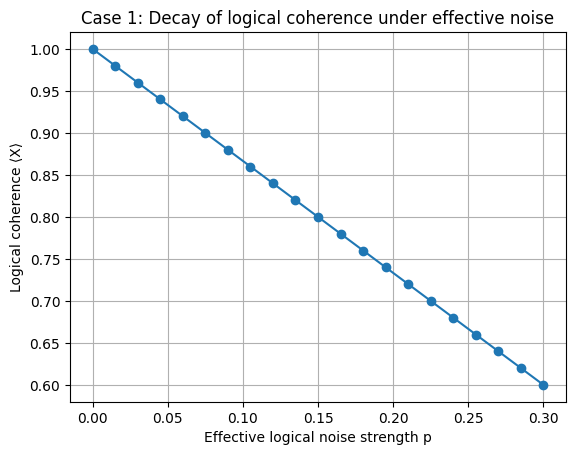

In [27]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Use a mixed-state simulator to model logical noise
dev = qml.device("default.mixed", wires=1)

@qml.qnode(dev)
def logical_gkp_coherence(noise_strength):
    """Logical qubit prepared in a superposition and subjected to effective logical noise."""
    qml.Hadamard(wires=0)                         # logical Clifford operation
    qml.DepolarizingChannel(noise_strength, 0)    # effective logical noise
    return qml.expval(qml.PauliX(0))              # logical coherence


print("Logical GKP qubit circuit (effective model):")
print(qml.draw(logical_gkp_coherence)(0.1))


# --- Sweep effective logical noise strength ---
ps = np.linspace(0.0, 0.30, 21)
coherences = []

print("\nLogical coherence vs effective noise:")
for p in ps:
    value = logical_gkp_coherence(p)
    coherences.append(value)
    print(f"  p = {p:.2f}  →  ⟨X⟩ = {value:.3f}")


# --- Plot logical coherence decay ---
plt.figure()
plt.plot(ps, coherences, marker="o")
plt.xlabel("Effective logical noise strength p")
plt.ylabel("Logical coherence ⟨X⟩")
plt.title("Case 1: Decay of logical coherence under effective noise")
plt.grid(True)
plt.show()

> *What are we seeing here in case 1 above?*

Let’s walk through the results step by step.

First, we prepare a logical qubit in a superposition using a Hadamard gate. In an ideal, noiseless world, this state is perfectly coherent, meaning the qubit maintains a clean quantum superposition. When we measure `⟨X⟩`, we get a value of `1.0`, which tells us that the superposition is fully intact.

Now we start to introduce effective logical noise (say; intentionally create disturbances), represented by the depolarizing channel. This noise is not meant to describe the detailed physics of photons, squeezing, or phase space. Instead, it captures the net effect of imperfections that remain after encoding and imperfect error correction.

As the noise strength p increases, we see a clear and steady trend:
	•	When `p = 0.00, ⟨X⟩ = 1.000`
→ the logical qubit is perfectly coherent.
	•	As p increases, `⟨X⟩` gradually decreases.
	•	By the time `p` gets to `0.30`, `⟨X⟩` has dropped to about `0.60`.

This drop in `⟨X⟩` means that the logical qubit is losing coherence. In very simple terms, the quantum information is becoming less reliable as noise increases.


> *How do we correct this?*

Now in the next case which is case 2; we will learn to correct this error beautifully using GKP correction code

## Case 2: What changes when error correction does its job?

In Case 1, we deliberately looked at what happens when effective logical noise is left unchecked. The takeaway was simple: as logical noise increases, coherence steadily decays, and the quantum state becomes less useful for computation.

Now let’s flip the question:

> *What if error correction successfully suppresses logical noise?*

At the software level, this does not mean that noise disappears completely. Instead, it means that the effective logical noise strength is reduced. In other words, error correction doesn’t change how the algorithm is written, it changes how much noise the algorithm experiences.

In this case, we model error correction by comparing:
- a logical qubit with higher effective noise (before correction), and
- the same logical qubit with reduced effective noise (after correction).

No additional circuit elements are required. The correction shows up entirely as a change in the noise parameter.

Logical GKP qubit circuit (same circuit, different noise levels):
0: ──H──DepolarizingChannel(0.15)─┤  <X>


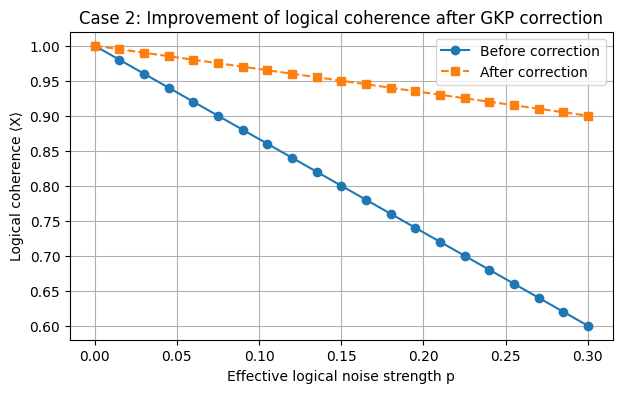

In [34]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.mixed", wires=1)

@qml.qnode(dev)
def logical_gkp_coherence(noise_strength):
    qml.Hadamard(wires=0)
    qml.DepolarizingChannel(noise_strength, wires=0)
    return qml.expval(qml.PauliX(0))


# Effective logical noise ranges
p_raw = np.linspace(0.0, 0.30, 21)          # before correction
alpha = 0.25                                # correction efficiency factor
p_corrected = alpha * p_raw                 # after correction

# Compute coherences
coh_raw = [logical_gkp_coherence(p) for p in p_raw]
coh_corrected = [logical_gkp_coherence(p) for p in p_corrected]

print("Logical GKP qubit circuit (same circuit, different noise levels):")
print(qml.draw(logical_gkp_coherence)(p_before))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(p_raw, coh_raw, "o-", label="Before correction")
plt.plot(p_raw, coh_corrected, "s--", label="After correction")

plt.xlabel("Effective logical noise strength p")
plt.ylabel("Logical coherence ⟨X⟩")
plt.title("Case 2: Improvement of logical coherence after GKP correction")
plt.legend()
plt.grid(True)
plt.show()

In Case 2, we model the effect of GKP error correction by reducing the effective logical noise strength according to

p_{\text{corrected}} = \alpha \, p_{\text{raw}} .

Here, `p_{\text{raw}}` represents the effective logical noise seen by a qubit before error correction, while `p_{\text{corrected}}` represents the noise that remains after correction. The parameter `\alpha \in (0,1)` captures how effective the error-correction process is at suppressing logical errors.

Intuitively, `\alpha` acts as a correction efficiency factor. Values of `\alpha` closer to one correspond to weaker correction, where a large fraction of the logical noise survives. Smaller values of `\alpha` correspond to stronger correction, where logical errors are more effectively suppressed. Reducing `\alpha` therefore leads directly to higher logical coherence, exactly as observed in the plot.

It is important to emphasize that `\alpha` is not derived from hardware physics in this demo. In a real photonic system, its value would depend on concrete physical factors such as squeezing levels, photon loss rates, measurement precision, and decoding strategies. Here, we deliberately treat \alpha as a tunable knob that lets us explore how improved error correction would appear at the software level, without committing to a specific hardware implementation.

> *How should we interpret the result in Case 2?*

The key thing to notice in the figure above is that the quantum circuit itself never changes.

In both cases, `before and after correction`, we prepare the same logical qubit, apply the same Hadamard gate, and measure the same observable `⟨X⟩`. There are no additional gates, no explicit correction steps, and no extra measurements introduced at the circuit level. From the software’s point of view, everything looks identical.

What does change is the effective logical noise associated with the qubit. Before correction, increasing logical noise leads to a steady decay of coherence. After correction, the same sweep of conditions corresponds to a reduced effective logical noise, and the coherence remains significantly higher across the entire range.

**The separation between the two curves is therefore the software-level signature of GKP error correction.**

> *What is actually happening under the hood?*

GKP error correction operates on the physical photonic degrees of freedom—continuous variables such as small displacements in phase space, well below the level of this circuit. Those physical processes never appear explicitly in the quantum program.

Instead, their net effect is captured by a reduction in the logical noise experienced by the qubit. In this demo, that reduction is modeled by scaling the effective logical noise parameter through `\alpha`. Smaller values of `\alpha` correspond to more effective correction, while larger values indicate that more logical noise remains.

While the numerical value of \alpha is hardware-dependent in practice, the qualitative outcome is universal: successful GKP correction suppresses logical errors before the qubit is exposed to the program.

> *Why this matters for quantum software*

From the perspective of an algorithm designer, error correction is not something you manually invoke. It is something that improves the quality of the logical qubits you are given.

This is why high-level frameworks like PennyLane can treat logical qubits uniformly, regardless of whether they come from superconducting devices, trapped ions, or photonic GKP encodings. The software interacts with the same abstraction; only the effective noise differs.

> *Lessons drawn from Case 2*

Effective error correction shows up at the software level as noise suppression, not circuit complexity. GKP encoding allows photonic hardware to deliver logical qubits that behave closer to ideal qubits, while keeping the continuous-variable physics hidden beneath the abstraction layer.

## Summary: What we did — and what we didn’t

> *What we did*

In this demo, we explored GKP-based quantum error correction from the software abstraction layer. Rather than simulating the full continuous-variable physics of photonic hardware, we modeled a GKP-encoded qubit as a logical two-level system subject to an effective logical noise channel.

Using PennyLane’s `DepolarizingChannel` with `default.mixed`, we showed how:
- logical coherence decays as effective logical noise increases (Case 1), and
- improved error correction appears as a reduction in that effective noise, leading to higher coherence without changing the circuit (Case 2).

This approach makes the architectural outcome of GKP error correction visible to quantum programs: better logical qubits with no added circuit complexity.

> *What we didn’t do*

Demo did not attempt to simulate the physical implementation of GKP error correction. In particular, this demo does not include:
- continuous-variable phase-space representations of GKP states (`defualt.gaussian`),
- explicit syndrome extraction or displacement correction,
- feedforward operations or decoding circuits,
- hardware-specific noise models such as photon loss or finite squeezing.

The correction efficiency parameter \alpha was treated as a tunable abstraction, not derived from first-principles hardware physics.

> *Why this distinction matters*

This separation is intentional. Real photonic error correction is a hardware-level process, while quantum software operates on logical qubits with effective noise models. By focusing on the interface between these layers, this demo highlights how GKP error correction is meant to appear to users of high-level frameworks like PennyLane: as improved logical qubits, not additional programming burden. That separation of concerns is exactly what makes scalable quantum software possible.

## Conclusion

This demo illustrated how GKP-based quantum error correction can be understood from a quantum software perspective, without relying on detailed models of photonic hardware.

In Case 1, effective logical noise was shown to gradually degrade coherence in a simple logical qubit. As the noise strength increased, the expectation value `⟨X⟩` decayed smoothly, making it clear how logical errors influence quantum programs even when the circuit itself remains extremely simple. This serves as a baseline view of how noise manifests at the abstraction layer seen by software.

In Case 2, the circuit was intentionally left unchanged, while the effect of GKP error correction was modeled through a reduction in effective logical noise. As the logical noise was suppressed, coherence improved consistently across the entire sweep. Crucially, this improvement did not arise from additional gates, measurements, or explicit correction steps in the program, but from an improvement in the quality of the logical qubit supplied to it.

These examples emphasize a key idea in photonic quantum computing: error correction operates below the software layer, while its benefits appear above it as reduced logical noise. At the level of quantum programs, GKP encoding does not introduce extra complexity, it delivers more reliable qubits.

This separation of concerns enables photonic hardware to integrate cleanly with high-level quantum programming frameworks and is a foundational ingredient for scalable quantum software.

## Further reading

For readers who would like to explore these ideas in more depth, the following references provide useful background on GKP encoding, bosonic error correction, and photonic quantum computing:

- [1] **D. Gottesman, A. Kitaev, and J. Preskill**,
  *Encoding a qubit in an oscillator*,
  arXiv:quant-ph/0008040 (2000).
  https://arxiv.org/abs/quant-ph/0008040

- [2] **N. C. Menicucci**,
  *Fault-tolerant measurement-based quantum computing with continuous-variable cluster states*,
  *Physical Review Letters* **112**, 120504 (2014).
  https://doi.org/10.1103/PhysRevLett.112.120504

- [3] **M. Mirrahimi et al.**,
  *Dynamically protected cat-qubits: a new paradigm for universal quantum computation*,
  *New Journal of Physics* **16**, 045014 (2014).
  https://doi.org/10.1088/1367-2630/16/4/045014

- [4] **M. Banić et al.**,
  *Exact simulation of realistic Gottesman–Kitaev–Preskill cluster states*,
  *Physical Review A* **112**, 052425 (2025).
  https://doi.org/10.1103/PhysRevA.112.052425

- [5] **V. Bergholm et al.**,
  *PennyLane: Automatic differentiation of hybrid quantum–classical computations*,
  arXiv:1811.04968 (2018).
  https://arxiv.org/abs/1811.04968